## IRIS DataSet

Step #1: Load the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = load_iris()

Load your dataset and split the data into training and testing data

In [2]:
# Create a pandas DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
iris_df['target'] = iris.target

# Split the data into input features (X) and target variable (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Apply your hyperparameters and train your model

In [3]:
# Convert the training and testing data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

[11:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Apply your hyperparameters and train your model

In [4]:
# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In addition to accuracy, there are several other evaluation metrics that can be used to assess the performance of a multi-class classification model. Here are some common ones:

- Confusion matrix: A confusion matrix provides a detailed breakdown of the number of true positives, false positives, true negatives, and false negatives for each class. It is a useful tool for understanding which classes the model is correctly and incorrectly classifying.

- Precision, Recall, and F1-score: These are commonly used metrics that provide a more nuanced evaluation of a model's performance than accuracy. Precision measures the fraction of true positives among all positive predictions, recall measures the fraction of true positives among all actual positives, and F1-score is the harmonic mean of precision and recall.

- ROC curve and AUC score: The ROC (Receiver Operating Characteristic) curve plots the true positive rate against the false positive rate for different threshold values. The AUC (Area Under the Curve) score is a measure of the overall performance of the model at all possible threshold values.

- Log loss: Log loss measures the performance of a classifier by penalizing false classifications. It is a commonly used metric for probabilistic classifiers like XGBoost.

- Cohen's Kappa: Cohen's Kappa is a statistic that measures inter-annotator agreement. In the context of machine learning, it can be used to assess the degree of agreement between the model's predictions and the true labels.

- Overall, it is important to consider multiple evaluation metrics when assessing the performance of a multi-class classification model, as no single metric provides a complete picture of the model's performance.

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, cohen_kappa_score, log_loss
import matplotlib.pyplot as plt

In [8]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Generate a classification report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen\'s Kappa Score: {kappa:.2f}')

# Calculate the log loss
y_pred_prob = xgb_model.predict(dtest, output_margin=True)
logloss = log_loss(y_test, y_pred_prob)
print(f'Log Loss: {logloss:.2f}')

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Cohen's Kappa Score: 1.00
Log Loss: 0.01


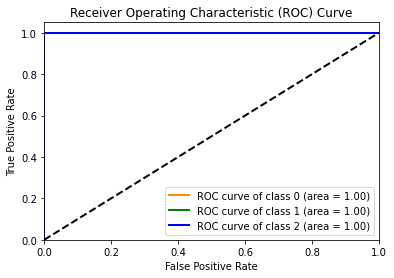

In [10]:
y_prob = xgb_model.predict(dtest, output_margin=True)
n_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
colors = ['darkorange', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot the diagonal line (baseline)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## MNIST Dataset

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Load your dataset and split the data into training and testing data

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split the data into input features (X) and target variable (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Apply your hyperparameters and train your model

In [ ]:
# Convert the training and testing data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': 10,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)


Run your prediction on your test set and evaluate

In [ ]:
# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Can you apply the same evaluation metrics we did in the IRIS dataset to the MNIST dataset?

In [ ]:
# code goes here